<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Fashion_MNIST_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST

## Introduction

This dataset is the analog of the MNIST dataset. It conatins sample images of ten types of clothing articles. We'll build and train a neural network to categorize the clothing type. The neural network is a multi-layer perceptron. The term **perceptron** seems to be used ambiguously in different resources. I use the **perception** to mean a layer, which consists of **neurons** or **TLUs**. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Data

We use the Keras API to load this built-in dataset. The load_data() method returns train and test sets already separated. There are 60,000 training samples and 10,000 testing samples. 

The samples are 28x28 grayscale images in the format of numpy arrays. Each entry is some pixel intensity from 0 to 255. The datatype is an 8-bit unsigned integer. Lables range from 0 to 9 according to the following:

|      0      |    1    |     2    | 3     | 4    | 5      | 6     | 7       | 8   | 9          |
|:-----------:|:-------:|:--------:|-------|------|--------|-------|---------|-----|------------|
| T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle Boot |

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data();
assert x_train.shape == (60000, 28, 28);
assert y_train.shape == (60000,);
assert x_test.shape == (10000, 28, 28);
assert y_test.shape == (10000,);

4431872/4422102 [==============================] - 0s 0us/step


Labels are numeric so we'll create a list of their names. Also, we normalize the features for better optimization.

In [26]:
y_labels = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'];
x_train = x_train/255.0;

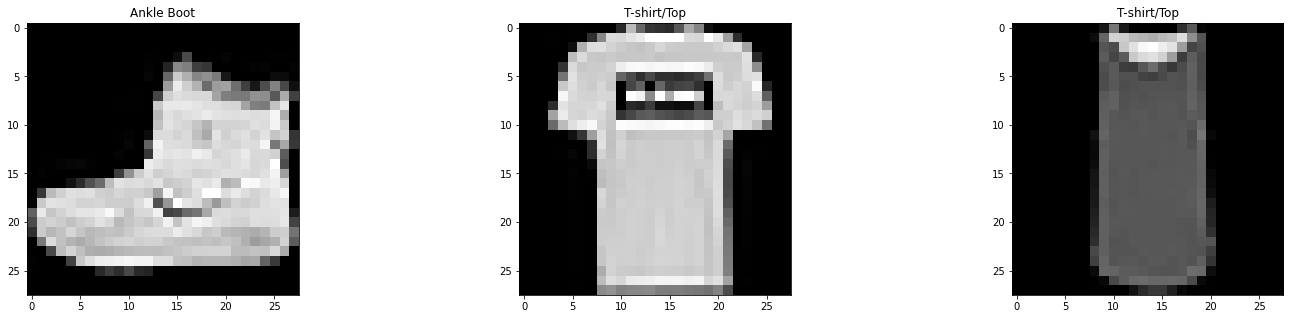

In [27]:
fig, ax = plt.subplots(1,3, figsize=(25,5))
ax[0].imshow(x_train[0], cmap='gray')
ax[0].set_title(y_labels[y_train[0]])
ax[1].imshow(x_train[1], cmap='gray')
ax[1].set_title(y_labels[y_train[1]])
ax[2].imshow(x_train[2], cmap='gray')
ax[2].set_title(y_labels[y_train[2]])
plt.show()


# Model

Our model will be a multi-layer perception neural network. It will consist of  one input layer, two hidden layers, and one output layer. Each of the hidden layers are dense, meaning each neuron is connected to each of the previous layers neurons.

The ReLU activation function is default for many neural networks, according to sources. ReLU is a piecewise linear function that zeros out negative output and leaves positive outputs alone. One of the benefits is that it takes care of the vanishing gradient issue for backpropagation. For our model, I don't think it's noticeable since we only have two layers.

The our 

In [30]:
model = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(300, activation='relu'),
     keras.layers.Dense(300, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
    ]
)

# Training and Evaluation